In [1]:
import pandas as pd
import numpy as np
import os

from scipy import stats

In [2]:
cwd = os.getcwd()

data_path = "F:\\Academic\\Research\\myData\\processed_dataset"
# tissue_type = 'liver'
tissue_type = 'pancreas'
# tissue_type = 'kidney'

df_mRNA = pd.read_csv(f'{data_path}\\{tissue_type}\\mRNA_bulk.csv')
df_mRNA = df_mRNA.drop('Unnamed: 0',axis=1)

df_miRNA = pd.read_csv(f'{data_path}\\{tissue_type}\\miRNA_bulk.csv')
df_miRNA = df_miRNA.drop('Unnamed: 0',axis=1)

df_miRNA

,gene_name,B21.MAA000574.3_8_M.1.1,D12.MAA000574.3_8_M.1.1,B22.MAA000574.3_8_M.1.1,D13.MAA000574.3_8_M.1.1,C1.MAA000574.3_8_M.1.1,D14.MAA000574.3_8_M.1.1,C2.MAA000574.3_8_M.1.1,C4.MAA000574.3_8_M.1.1,A1.MAA000574.3_8_M.1.1,...,M17.MAA001868.3_38_F.1.1,O5.MAA001868.3_38_F.1.1,P15.MAA001868.3_38_F.1.1,D6.MAA001868.3_38_F.1.1,G3.MAA001868.3_38_F.1.1,I9.MAA001868.3_38_F.1.1,K10.MAA001868.3_38_F.1.1,M19.MAA001868.3_38_F.1.1,O9.MAA001868.3_38_F.1.1,P16.MAA001868.3_38_F.1.1
0,Mir100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mir101b,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mir103-2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Mir1188,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Mir1191,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,Mirlet7e,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278,Mirlet7f-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
279,Mirlet7f-2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280,Mirlet7g,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
temp_allgenes = df_mRNA.drop(df_mRNA.index[(df_mRNA.iloc[:,1:].sum(axis = 1) < 100)])
temp_allgenes = temp_allgenes.set_index('gene_name').T

temp_allgenes

gene_name,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610009B14Rik,0610009B22Rik,0610009D07Rik,...,Zxda,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6
B21.MAA000574.3_8_M.1.1,0,43,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1072,0,0,0
D12.MAA000574.3_8_M.1.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B22.MAA000574.3_8_M.1.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2529,0,5765,0,0
D13.MAA000574.3_8_M.1.1,0,0,77,0,0,0,0,0,0,0,...,6,1,0,0,0,2,0,23,0,0
C1.MAA000574.3_8_M.1.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I9.MAA001868.3_38_F.1.1,0,0,0,0,0,0,0,0,0,0,...,0,0,44,0,9,2,87,4,0,0
K10.MAA001868.3_38_F.1.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
M19.MAA001868.3_38_F.1.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
O9.MAA001868.3_38_F.1.1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
corr_tally = pd.DataFrame(columns=['tally'])

for col in temp_allgenes:
    corr_tally.loc[col] = [0]

In [5]:
temp_mir = df_miRNA.drop(df_miRNA.index[(df_miRNA.iloc[:,1:].sum(axis = 1) < 90)])
temp_mir = temp_mir.set_index('gene_name').T

# corr_df = pd.DataFrame()

all_corr = []


corr_thres = 0.3
# miCol = 3
# temp_mir.iloc[:,miCol]

for miCol in range(temp_mir.shape[1]):
    for col in temp_allgenes:
        r, p = stats.pearsonr(temp_mir.iloc[:,miCol], temp_allgenes[col])
        
        all_corr.append(r)

        if(r>corr_thres):
            corr_tally.loc[col] = corr_tally.loc[col] + 1

        # corr_df.iloc[col, miCol] = round(r, 3)

# corr_df[(corr_df.r>0.3)]

In [ ]:
high_corr_genes = corr_tally.sort_values('tally', ascending=False)[0:2500]

In [ ]:
# r, p = stats.pearsonr(temp_mir126, temp_allgenes.iloc[:,1])


corr_tally[corr_tally.tally>0]


,tally
0610005C13Rik,1
0610007L01Rik,1
0610009D07Rik,1
0610010K14Rik,1
0610037P05Rik,2
...,...
Zswim3,3
Zswim6,1
Zxdc,1
Zyx,1


In [95]:
high_corr_genes.sort_index().index

Index(['0610005C13Rik', '0610037P05Rik', '1110059G10Rik', '1190002H23Rik',
       '1500004A13Rik', '1500010J02Rik', '1700016G22Rik', '1700019L03Rik',
       '1700034H15Rik', '1700049G17Rik',
       ...
       'Znf512b', 'Znhit3', 'Znrd1as', 'Znrf2', 'Zpbp', 'Zswim3', 'Zswim6',
       'Zxdc', 'Zyx', 'Zzef1'],
      dtype='object', length=2500)

In [96]:
final_mRNA_gene_dataset = temp_allgenes[high_corr_genes.sort_index().index]
final_mRNA_gene_dataset.to_csv(f'{data_path}\\{tissue_type}\\highly_expressed_2500_genes.csv')



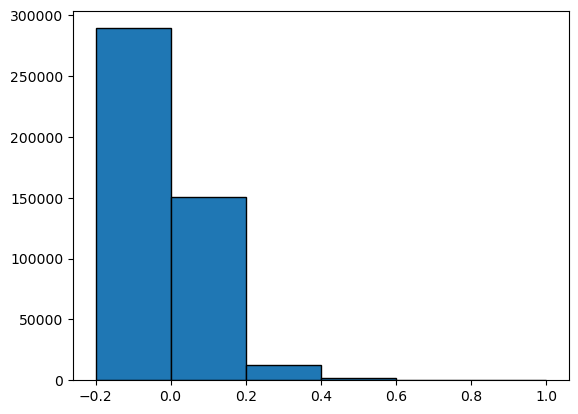

In [97]:
# temp_mir126 = df_miRNA.set_index('gene_name').T
# temp_mir126 = temp_mir126.Mir126



all_corr


import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
import pandas as pd


bins= [-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]
plt.hist(all_corr, bins=bins, edgecolor="k")
plt.xticks(bins)

plt.show()

In [98]:
# corr_df = pd.DataFrame(columns=['r', 'p'])

# for col in temp_allgenes:
#     r, p = stats.pearsonr(temp_mir126, temp_allgenes[col])
#     corr_df.loc[col] = [round(r, 3), round(p, 3)]

In [99]:
high_corr_genes

,tally
Evi2a,5
Ppia,4
Rn45s,4
Hnrnpf,4
Evi2b,4
...,...
Tsc22d3,1
Tsc2,1
Trub2,1
Trpm2,1


In [100]:
corr_df[(corr_df.p>0.3)]

AttributeError: 'DataFrame' object has no attribute 'p'